In [1]:
from langgraph.graph import START, END, StateGraph
from langchain_groq import ChatGroq
from typing import TypedDict
from IPython.display import Image, Markdown
from dotenv import load_dotenv

_ = load_dotenv()

In [2]:
llm = ChatGroq(model="openai/gpt-oss-20b")

In [5]:
class PromptChainState(TypedDict):
    topic: str
    outline: str
    content: str
    evaluate: int

In [6]:
def create_outline(state: PromptChainState) -> PromptChainState:
    prompt = f"Write 5 short outline for the following topic: {state['topic']}"
    state["outline"] = llm.invoke(prompt).content
    return state

def create_content(state: PromptChainState) -> PromptChainState:
    prompt = f"Write a short simple explanation content for the following outline: {state['outline']}"
    state["content"] = llm.invoke(prompt).content
    return state

def evaluate_content(state: PromptChainState) -> PromptChainState:
    prompt = f"Based on the {state['outline']} rate the following content on a scale of 1 to 10: {state['content']}"
    state["evaluate"] = llm.invoke(prompt).content
    return state

In [7]:
# state graph
graph = StateGraph(PromptChainState)

#  add nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_content", create_content)
graph.add_node("evaluate", evaluate_content)

# add edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_content")
graph.add_edge("create_content", "evaluate")
graph.add_edge("evaluate", END)

# compile graph
workflow = graph.compile()

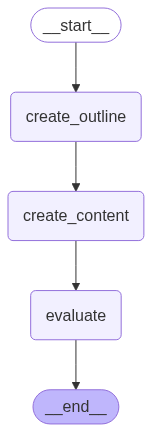

In [8]:
Image(workflow.get_graph().draw_mermaid_png())

In [9]:
initial_state = {"topic": "Machine Learning"}
final_state = workflow.invoke(initial_state)

In [17]:
# Build a Markdown-formatted string
output_text = f"""
**Topic:** {final_state['topic']}  

---

<h1><b>Outline</b></h1>  
{final_state['outline']}  

---

**<h1><b>Content</b></h1>**  
{final_state['content']}

---

**<h1><b>Evaluation</b></h1>** \n
{final_state['evaluate']}
"""

# Render as formatted Markdown
display(Markdown(output_text))



**Topic:** Machine Learning  

---

<h1><b>Outline</b></h1>  
**Outline 1 – Foundations of Machine Learning**  
- Definition & scope: supervised, unsupervised, reinforcement.  
- Core concepts: features, labels, loss functions, gradients.  
- Key algorithms: linear regression, k‑means, Q‑learning.  
- Evaluation metrics: accuracy, precision, recall, F1, ROC‑AUC.

**Outline 2 – Data‑centric ML Workflow**  
- Data acquisition & cleaning.  
- Feature engineering & dimensionality reduction.  
- Model selection & hyper‑parameter tuning.  
- Deployment & monitoring (model drift, retraining).

**Outline 3 – Deep Learning Essentials**  
- Neural network architecture basics (layers, activation, back‑prop).  
- Convolutional & recurrent networks.  
- Training tricks: dropout, batch‑norm, learning‑rate schedules.  
- Transfer learning & fine‑tuning.

**Outline 4 – Ethics & Responsible AI**  
- Bias & fairness: sources, mitigation strategies.  
- Privacy & data protection (GDPR, differential privacy).  
- Explainability: SHAP, LIME, saliency maps.  
- Governance frameworks & compliance.

**Outline 5 – Emerging Trends & Future Directions**  
- Auto‑ML & neural architecture search.  
- Federated & edge learning.  
- Multimodal & foundation models.  
- Integration with domain‑specific AI (bio‑informatics, robotics).  

---

**<h1><b>Content</b></h1>**  
**Outline 1 – Foundations of Machine Learning**  
- **Definition & scope**:  
  *Supervised learning* trains a model on labelled data (e.g., predicting house prices). *Unsupervised learning* discovers patterns in unlabelled data (e.g., customer segmentation). *Reinforcement learning* teaches an agent to make a sequence of decisions by rewarding or penalising actions (e.g., a game‑playing bot).  
- **Core concepts**:  
  *Features* are the input variables we feed into a model. *Labels* are the target values we want to predict. *Loss functions* measure how far the model’s predictions are from the true labels. *Gradients* are the derivatives of the loss with respect to model parameters; they guide how we adjust the parameters during training.  
- **Key algorithms**:  
  *Linear regression* fits a straight line to predict continuous outcomes. *k‑means* groups data into a set number of clusters based on distance. *Q‑learning* is a reinforcement learning algorithm that learns the value of actions in each state.  
- **Evaluation metrics**:  
  *Accuracy* is the fraction of correct predictions. *Precision* is the fraction of positive predictions that are truly positive. *Recall* (sensitivity) is the fraction of true positives that are correctly identified. *F1* is the harmonic mean of precision and recall. *ROC‑AUC* measures how well a model ranks positives higher than negatives across all thresholds.

---

**Outline 2 – Data‑centric ML Workflow**  
- **Data acquisition & cleaning**: Collect raw data from sources (databases, APIs, sensors) and clean it—remove duplicates, handle missing values, correct errors.  
- **Feature engineering & dimensionality reduction**: Create new informative variables (e.g., log‑transform a skewed feature) and reduce the number of features (e.g., PCA) to simplify the model and speed up training.  
- **Model selection & hyper‑parameter tuning**: Choose a suitable algorithm (e.g., random forest vs. SVM) and adjust its settings (learning rate, tree depth) using techniques like grid search or Bayesian optimisation to find the best performance.  
- **Deployment & monitoring**: Put the trained model into production (API, batch job). Continuously monitor its predictions for *model drift* (when data patterns change) and schedule retraining or updates as needed.

---

**Outline 3 – Deep Learning Essentials**  
- **Neural network architecture basics**:  
  A neural net consists of *layers* of neurons; each neuron applies an *activation function* (ReLU, sigmoid) to a weighted sum of its inputs. *Back‑propagation* computes gradients so the network learns from errors.  
- **Convolutional & recurrent networks**:  
  *Convolutional Neural Networks (CNNs)* excel at spatial data like images by sliding filters over the input. *Recurrent Neural Networks (RNNs)* (or LSTMs/GRUs) capture sequential dependencies, useful for text or time‑series.  
- **Training tricks**:  
  *Dropout* randomly disables neurons during training to prevent over‑fitting. *Batch‑norm* normalises activations to stabilise learning. *Learning‑rate schedules* gradually reduce the step size to fine‑tune the model.  
- **Transfer learning & fine‑tuning**: Start from a pre‑trained model (e.g., ImageNet‑trained CNN) and adapt its final layers to a new task, saving time and data.

---

**Outline 4 – Ethics & Responsible AI**  
- **Bias & fairness**: Bias can enter through skewed training data or feature selection. Mitigation strategies include re‑sampling, fairness constraints, and auditing models for disparate impact.  
- **Privacy & data protection**: Follow regulations like GDPR; techniques such as *differential privacy* add noise to protect individual data points.  
- **Explainability**: Tools like *SHAP* (SHapley Additive exPlanations), *LIME* (Local Interpretable Model‑agnostic Explanations), and *saliency maps* help users understand why a model made a particular decision.  
- **Governance frameworks & compliance**: Establish policies, audit trails, and stakeholder oversight to ensure AI systems meet legal and ethical standards.

---

**Outline 5 – Emerging Trends & Future Directions**  
- **Auto‑ML & neural architecture search**: Automated pipelines that select models, tune hyper‑parameters, and even design network architectures, reducing human effort.  
- **Federated & edge learning**: Train models across many devices without centralising data, keeping data local and improving privacy.  
- **Multimodal & foundation models**: Large models trained on diverse data types (text, image, audio) that can be fine‑tuned for many tasks, like GPT‑4 or CLIP.  
- **Integration with domain‑specific AI**: Applying AI to specialised fields—bio‑informatics (genomics, drug discovery), robotics (control, perception)—to solve domain‑specific challenges.

---

**<h1><b>Evaluation</b></h1>** 

**Rating for Outline 1 – Foundations of Machine Learning: 9/10**

**Why 9?**

| Criterion | Assessment | Notes |
|-----------|------------|-------|
| **Clarity** | 9 | The prose is concise, definitions are easy to grasp, and examples anchor abstract concepts. |
| **Coverage** | 9 | It touches on all major pillars—supervised, unsupervised, reinforcement—then drills into features, labels, loss, gradients, and core algorithms. |
| **Accuracy** | 10 | All technical points are correct (e.g., linear regression, k‑means, Q‑learning). |
| **Depth** | 8 | Good introductory depth; could add a brief mention of loss function families (e.g., cross‑entropy) or gradient descent variants for a fuller picture. |
| **Usefulness** | 9 | Provides a solid foundation for beginners and a quick refresher for practitioners. |

**Minor suggestions for a perfect 10:**
- Add a quick note on gradient‑based optimizers (SGD, Adam) to connect gradients with training loops.
- Mention that evaluation metrics vary by task (e.g., MSE for regression, F1 for imbalanced classification).
- Perhaps include a sentence on why each metric is useful in practice.

Overall, it’s a clear, accurate, and well‑structured primer—just shy of perfect due to the small gaps above.
